# Lesson 0025 - MNIST Classification Convolutional Neural Network Transfer Learning
In this lesson, we try something new: in the last few lessons, we trained convolutional neural networks on the MNIST digits data set. But there also exists a MNIST fashion data set.<br>
Therefore, we load the model from [lesson 0023](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0023_mnist_classification_convolutional_neural_network_6.ipynb) and perform transfer learning using this model.<br>
The idea of transfer learning is, that we predict the second to last layer of the loaded network using the images from the fashion data set as input. Once we have these predicted data, we train a linear classifier like in [lesson 0001](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0001_iris_classification_linear_classifier.ipynb).<br>
This works, since the first convolutional layers actually analyze an image for some patterns like horizontal or vertical lines, and the actual classifier is only in the last layer. Therefore, when we predict the second to last layer using the fashion data, we get data that represent these patterns, and on this representation we train a linear classifier.<br>
We get the fashion data set from [keras](https://keras.io/datasets/).<br>
We begin by stealing code from [lesson 0023](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0023_mnist_classification_convolutional_neural_network_6.ipynb):

In [1]:
import tensorflow as tf

tf.set_random_seed( 1234567890 )

print( tf.__version__ )

1.13.1


Now, we import the data from [keras](https://keras.io/datasets/):

In [2]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

Since we do not know the data, we perform some exploratory analysis like in [lesson 0010](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0010_mnist_classification_linear_classifier.ipynb), from where we steal lots of code:

In [3]:
print( train_x[ 0 ] )

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

It seems, like all the __x__ data are integers. Let's check the dimensions of the data:

In [4]:
print( len( train_x[ 0 ] ) )

28


In [5]:
print( len( train_x[ 0 ][ 0 ] ) )

28


In [6]:
print( len( train_x ) )

60000


In [7]:
print( len( test_x ) )

10000


In [8]:
print( train_y[ 0 ] )

9


Ok, it seems, like we $60000$ training images and $10000$ test images of $28*28$ pixels which are encoded in integer values. Let's find out, how many classes there are.

In [9]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.16.2


In [10]:
print( np.unique( train_y ) )

[0 1 2 3 4 5 6 7 8 9]


Ok, so we got $10$ classes.

In [11]:
import matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

3.0.3


([], <a list of 0 Text yticklabel objects>)

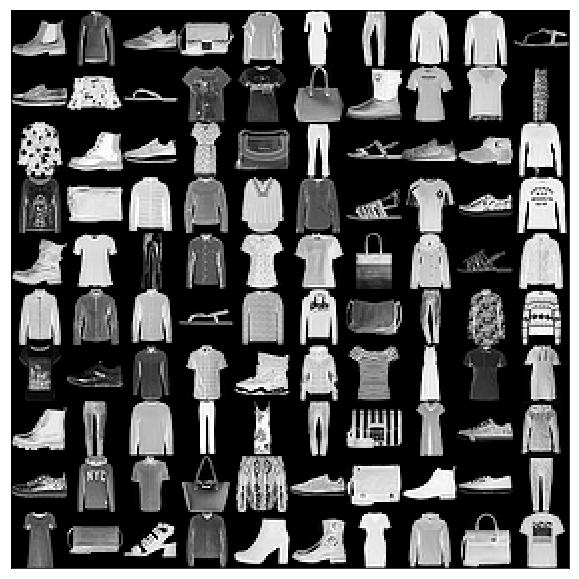

In [12]:
random_integers = np.random.choice( range( 60000 ), 100, replace = False )



mat = np.zeros( shape = [ 280, 280 ] )



for i in range( 10 ):
    
    for j in range( 10 ):
        
        x_d = i * 28
        
        x_u = 28 + i * 28
        
        y_l = j * 28
        
        y_r = 28 + j * 28
        
        mat[ x_d : x_u, y_l : y_r ] = train_x[ random_integers[ i * 10 + j ] ]
        

        
plt.figure( 1, figsize = ( 10, 10 ) )
        
plt.matshow( mat, cmap = plt.cm.gray, fignum = 1 )

plt.xticks( [ ] )

plt.yticks( [ ] )

Ok, now we see, why this data set is called fashion data: we see various kinds of boots, shoes, trousers, shirts, bags and so on.

In [13]:
mu = np.mean( train_x )

sigma = np.std( train_x )



train_x = ( train_x - mu ) / sigma

test_x = ( test_x - mu ) / sigma

Now, we steal code from [lesson 0023](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0023_mnist_classification_convolutional_neural_network_6.ipynb) to transform the __y__ data:

In [14]:
train_y_2 = np.zeros( shape = [ 60000, 10 ] )

test_y_2 = np.zeros( shape = [ 10000, 10 ] )




for i in range( 60000 ):
    
    train_y_2[ i, train_y[ i ] ] = 1.0
    
    
for i in range( 10000 ):
    
    test_y_2[ i, test_y[ i ] ] = 1.0
    




train_y = train_y_2

test_y = test_y_2

Now, we steal code from [lesson 0014](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0014_mnist_classification_neural_network.ipynb) and [lesson 0023](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0023_mnist_classification_convolutional_neural_network_6.ipynb) to load the model from [lesson 0023](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0023_mnist_classification_convolutional_neural_network_6.ipynb):

In [15]:
x_tf = tf.placeholder( tf.float32, shape = [ None, 28, 28, 1 ] )

y_tf = tf.placeholder( tf.float32, shape = [ None, 10 ] )

dropout_rate = tf.placeholder( tf.float32 )




conv1 = tf.layers.conv2d( x_tf, filters = 512, kernel_size = [ 5, 5 ], name = 'conv1' )

max1 = tf.layers.max_pooling2d( conv1, pool_size = [ 2, 2 ], strides = [ 2, 2 ] )

conv2 = tf.layers.conv2d( max1, filters = 512, kernel_size = [ 5, 5 ] )

max2 = tf.layers.max_pooling2d( conv2, pool_size = [ 2, 2 ], strides = [ 2, 2 ])

flat = tf.layers.flatten( max2 )

dropout = tf.layers.dropout( flat, rate = dropout_rate )





W_tf = tf.Variable( tf.truncated_normal( [ 8192, 10 ] ) )

b_tf = tf.Variable( tf.truncated_normal( [ 10 ] ) )

output = tf.nn.leaky_relu( tf.matmul( dropout, W_tf ) + b_tf )




cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( logits = output, labels = y_tf ) )




gd = tf.train.GradientDescentOptimizer( 0.001 ).minimize( cross_entropy )



hit = tf.equal( tf.argmax( output, 1 ), tf.argmax( y_tf, 1 ) )



accuracy = 100 * tf.reduce_mean( tf.cast( hit, tf.float32 ) )

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dropout instead.


In [16]:
sess = tf.Session()

saver = tf.train.Saver()

saver.restore( sess, "C:\\Users\\rhopi\\OneDrive\\Desktop\\python dev\\github\\lesson_0023\\model\\convolutional_neural_network_512_512_dropout" )

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\rhopi\OneDrive\Desktop\python dev\github\lesson_0023\model\convolutional_neural_network_512_512_dropout


Now that we have restored the model from [lesson 0023](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0023_mnist_classification_convolutional_neural_network_6.ipynb), we predict the output of the __flat__ layer using the __training__ and the __test__ data.<br>
As in [lesson 0023](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0023_mnist_classification_convolutional_neural_network_6.ipynb) we have to reshape the data and feed it chunkwise to avoid out of memory errors:

In [17]:
reshaped_train_x = np.reshape( train_x, newshape = [ 60000,28, 28, 1 ] )

reshaped_test_x = np.reshape( test_x, newshape = [ 10000,28, 28, 1 ] )




pred_train_x = np.zeros( shape = [ 60000, 8192 ] )

pred_test_x = np.zeros( shape = [ 10000, 8192 ] )




for i in range( 60 ):
    
    pred_train_x[ ( i * 1000 ) : ( ( i + 1 ) * 1000 ), : ] = sess.run( flat, feed_dict = { x_tf : reshaped_train_x[ ( i * 1000 ) : ( ( i + 1 ) * 1000 ), :, :, : ] } )
    
for i in range( 10 ):
    
    pred_test_x[ ( i * 1000 ) : ( ( i + 1 ) * 1000 ), : ] = sess.run( flat, feed_dict = { x_tf : reshaped_test_x[ ( i * 1000 ) : ( ( i + 1 ) * 1000 ), :, :, : ] } )

Now we have predicted what the input images from the fashion data set look like in the __flat__ layer of the model from [lesson 0023](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0023_mnist_classification_convolutional_neural_network_6.ipynb).<br>
Next, we steal code from lesson [0010](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0010_mnist_classification_linear_classifier.ipynb) to train a linear classifier on these data.<br>
We train for $200000$ iterations with a learning rate of $0.1$ on $100$ randomly drawn training data.

In [18]:
x_tf_2 = tf.placeholder( tf.float32, shape = [ None, 8192 ] )

y_tf_2 = tf.placeholder( tf.float32, shape = [ None, 10 ] )

W_tf_2 = tf.Variable( tf.zeros( [ 8192, 10 ] ) )

b_tf_2 = tf.Variable( tf.zeros( [ 10 ] ) )

classifier = tf.matmul( x_tf_2, W_tf_2 ) + b_tf_2



cross_entropy_2 = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( logits = classifier, labels = y_tf_2 ) )



gd_2 = tf.train.GradientDescentOptimizer( 0.1 ).minimize( cross_entropy_2 )



hit_2 = tf.equal( tf.argmax( classifier, 1 ), tf.argmax( y_tf_2, 1 ) )



accuracy_2 = 100 * tf.reduce_mean( tf.cast( hit_2, tf.float32 ) )

In [19]:
progress_train_s = []

progress_train = []

progress_test = []

iterations = []


sess.run( tf.global_variables_initializer() )

for i in range( 200000 ):
    
    random_integers = np.random.choice( range( 60000 ), 100, replace = False )
    
    local_x = pred_train_x[ random_integers, : ]
    
    local_y = train_y[ random_integers, : ]
    
    sess.run( gd_2, feed_dict = { x_tf_2 : local_x, y_tf_2 : local_y } )
    
    if ( ( i % 100 ) == 0 ):
    
        progress_train_s.append( sess.run( accuracy_2, feed_dict = { x_tf_2 : local_x, y_tf_2 : local_y } ) )
    
        progress_train.append( sess.run( accuracy_2, feed_dict = { x_tf_2 : pred_train_x, y_tf_2 : train_y } ) )
    
        progress_test.append( sess.run( accuracy_2, feed_dict = { x_tf_2 : pred_test_x, y_tf_2 : test_y } ) )
        
        iterations.append( i )

Text(0, 0.5, 'Accuracy (%)')

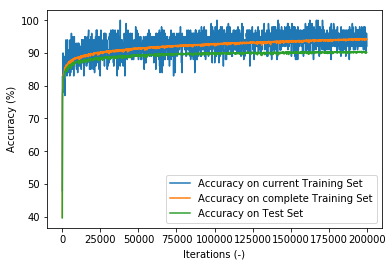

In [20]:
plt.plot( iterations, progress_train_s, label = 'Accuracy on current Training Set' )

plt.plot( iterations, progress_train, label = 'Accuracy on complete Training Set' )

plt.plot( iterations, progress_test, label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'Accuracy (%)' )

Text(0, 0.5, 'Accuracy (%)')

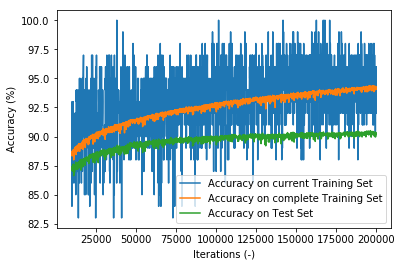

In [21]:
plt.plot( iterations[ 100 : 2000 ], progress_train_s[ 100 : 2000 ], label = 'Accuracy on current Training Set' )

plt.plot( iterations[ 100 : 2000 ], progress_train[ 100 : 2000 ], label = 'Accuracy on complete Training Set' )

plt.plot( iterations[ 100 : 2000 ], progress_test[ 100 : 2000 ], label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'Accuracy (%)' )

Now, we can't actually tell, how good this performance is.<br>
Therefore, we train a linear classifier like in [lesson 0010](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0010_mnist_classification_linear_classifier.ipynb).<br>
For this, we first have to flatten the __training__ and __test__ data like in [lesson 0010](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0010_mnist_classification_linear_classifier.ipynb)

In [22]:
train_x_f = np.zeros( shape = [ 60000, 28 * 28 ] )

test_x_f = np.zeros( shape = [ 10000, 28 * 28 ] )





    

for i in range( 60000 ):
    
    dummy = np.array( train_x[ i ] )
    
    train_x_f[ i, : ] = dummy.flatten()
    
    
for i in range( 10000 ):
    
    dummy = np.array( test_x[ i ] )
    
    test_x_f[ i ] = dummy.flatten()
    
    
    
    
train_x = train_x_f

test_x = test_x_f

Next we build a linear classifier which we will train for $10000$ iterations with a learning rate of $0.1$ on $100$ randomly drawn training data.

In [23]:
x_tf_3 = tf.placeholder( tf.float32, shape = [ None, 28 * 28 ] )

y_tf_3 = tf.placeholder( tf.float32, shape = [ None, 10 ] )

W_tf_3 = tf.Variable( tf.zeros( [ 28 * 28, 10 ] ) )

b_tf_3 = tf.Variable( tf.zeros( [ 10 ] ) )

classifier_lin = tf.matmul( x_tf_3, W_tf_3 ) + b_tf_3



cross_entropy_lin = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( logits = classifier_lin, labels = y_tf_3 ) )



gd_lin = tf.train.GradientDescentOptimizer( 0.1 ).minimize( cross_entropy_lin )



hit_lin = tf.equal( tf.argmax( classifier_lin, 1 ), tf.argmax( y_tf_3, 1 ) )



accuracy_lin = 100 * tf.reduce_mean( tf.cast( hit_lin, tf.float32 ) )

In [24]:
progress_train_s_lin = []

progress_train_lin = []

progress_test_lin = []

iterations_lin = []


sess.run( tf.global_variables_initializer() )

for i in range( 10000 ):
    
    random_integers = np.random.choice( range( 60000 ), 100, replace = False )
    
    local_x = train_x[ random_integers, : ]
    
    local_y = train_y[ random_integers, : ]
    
    sess.run( gd_lin, feed_dict = { x_tf_3 : local_x, y_tf_3 : local_y } )
    
    if ( ( i % 100 ) == 0 ):
    
        progress_train_s_lin.append( sess.run( accuracy_lin, feed_dict = { x_tf_3 : local_x, y_tf_3 : local_y } ) )
    
        progress_train_lin.append( sess.run( accuracy_lin, feed_dict = { x_tf_3 : train_x, y_tf_3 : train_y } ) )
    
        progress_test_lin.append( sess.run( accuracy_lin, feed_dict = { x_tf_3 : test_x, y_tf_3 : test_y } ) )
        
        iterations_lin.append( i )

Text(0, 0.5, 'Accuracy (%)')

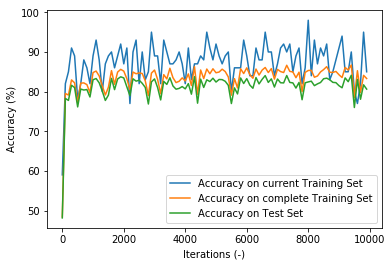

In [25]:
plt.plot( iterations_lin, progress_train_s_lin, label = 'Accuracy on current Training Set' )

plt.plot( iterations_lin, progress_train_lin, label = 'Accuracy on complete Training Set' )

plt.plot( iterations_lin, progress_test_lin, label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'Accuracy (%)' )

Text(0, 0.5, 'Accuracy (%)')

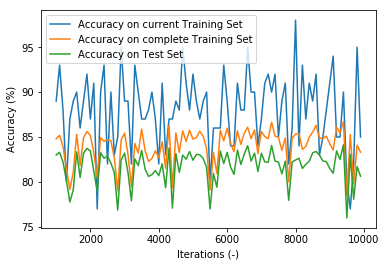

In [26]:
plt.plot( iterations_lin[ 10 : 100 ], progress_train_s_lin[ 10 : 100 ], label = 'Accuracy on current Training Set' )

plt.plot( iterations_lin[ 10 : 100 ], progress_train_lin[ 10 : 100 ], label = 'Accuracy on complete Training Set' )

plt.plot( iterations_lin[ 10 : 100 ], progress_test_lin[ 10 : 100 ], label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'Accuracy (%)' )

Now, we save the models.

In [27]:
saver.save( sess, "C:\\Users\\rhopi\\OneDrive\\Desktop\\python dev\\github\\lesson_0025\\model\\transfer_learning" )

'C:\\Users\\rhopi\\OneDrive\\Desktop\\python dev\\github\\lesson_0025\\model\\transfer_learning'

Now, we close the __session__

In [28]:
sess.close()

When we compare the accuracy of the transfer learning model and the accuracy of the linear classifier, we notice, that the transfer learning model outperforms the linear classifier, even though we trained for both models only a linear classifier.<br>
This shows how powerful the transfer learning scheme is.<br>
So, we learn from this lesson, that we can always consider what kind of problem we ware dealing with, and then research whether there exists a very successful network for a similar task and just transfer learn using this model.<br>
Class dismissed.